In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 813ms/step - accuracy: 0.0547 - loss: 2.5352
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0792 - loss: 2.4551 - val_accuracy: 0.0563 - val_loss: 2.2918
Epoch 2/1000
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0469 - loss: 2.4149
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0804 - loss: 2.3477 - val_accuracy: 0.1294 - val_loss: 2.2735
Epoch 3/1000
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0703 - loss: 2.3557
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0972 - loss: 2.3235 - val_accuracy: 0.1629 - val_loss: 2.2596
Epoch 4/1000
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0938 - loss: 2.3065
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9240 - loss: 0.4569 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[9.9761581e-01 5.2485570e-06 3.7010203e-04 1.0115917e-08 1.0397054e-04
 2.2815807e-07 1.3830261e-03 4.4688187e-04 2.9283983e-05 4.5551817e-05]
0


# Confusion matrix

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


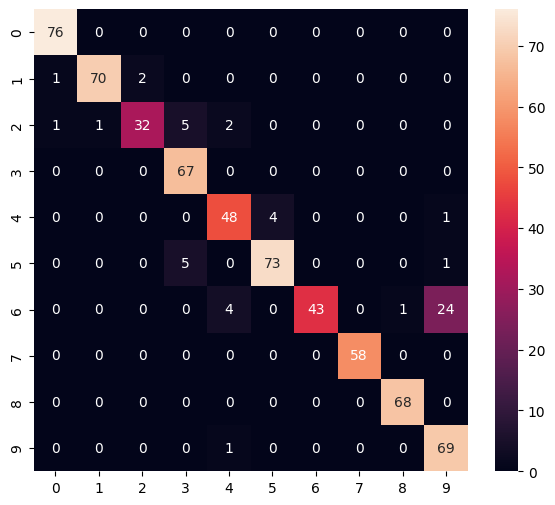

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       0.99      0.96      0.97        73
           2       0.94      0.78      0.85        41
           3       0.87      1.00      0.93        67
           4       0.87      0.91      0.89        53
           5       0.95      0.92      0.94        79
           6       1.00      0.60      0.75        72
           7       1.00      1.00      1.00        58
           8       0.99      1.00      0.99        68
           9       0.73      0.99      0.84        70

    accuracy                           0.92       657
   macro avg       0.93      0.92      0.91       657
weighted avg       0.93      0.92      0.92       657



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
import tensorflow as tf

def convert_and_quantize_model(model, tflite_save_path):
    """
    Convert and quantize the provided Keras model and save the quantized TFLite model.
    
    Args:
    - model: The Keras model to convert and quantize.
    - tflite_save_path: The path to save the quantized TFLite model.
    """
    # Convert the Keras model to a TFLite model
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    
    # Set optimization for quantization
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    
    # Convert and quantize the model
    tflite_quantized_model = converter.convert()
    
    # Save the quantized TFLite model to the specified path
    open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Example usage
# Replace 'model' and 'tflite_save_path' with your actual model and save path
# convert_and_quantize_model(model, tflite_save_path)


# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.7196601e-02 8.6489123e-01 8.7910771e-02 1.3499174e-06]
1
